<a href="https://colab.research.google.com/github/igorpereirabr1/Colaboratory/blob/master/Binary_Classification_Dog_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 - Objective

Implement a CNN with Keras and Tensorflow to predict classes of images

# 01- Mount Directory and Define project Path

In [7]:

import os
import sys
from google.colab import drive

drive.mount('/content/gdrive')

project_path = "/content/gdrive/My Drive/01-DataScience/01-Deep Learning/01-Keras/00-CNN"

dataset_path = "/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets"



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 02 - Download the Dataset and Unzip

In [0]:
#Set current path to download files

os.chdir(dataset_path)


In [0]:
#Download the Dataset
##!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [0]:
#unzip the dataset
!unzip kagglecatsanddogs_3367a.zip

In [0]:
#Check current files
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 13 16:47 .
drwxr-xr-x 1 root root 4096 May 16 10:25 ..
drwxr-xr-x 1 root root 4096 May 13 16:48 .config
drwxr-xr-x 1 root root 4096 May 13 16:48 sample_data


In [0]:
#Remove zip file 
!rm kagglecatsanddogs_3367a.zip


In [0]:
#set the new dataset path
dataset_path = os.path.join(dataset_path,'PetImages')

# 03 -Importing Libraries and Splitting the Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D,Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import History 
import matplotlib.pyplot as plt


In [0]:
#Initialize the CNN
classifier = Sequential()

#Step 1  - Convulution
classifier.add(Conv2D(32,(3,3),input_shape= (64, 64, 3),activation='relu'))
#classifier.add(Convolution2D(32,3,3,input_shape= (64, 64, 3),activation='relu'))

#Step 2 - Polling
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step 3 - Flatten
classifier.add(Flatten())

# 4 — Full Connection

In [0]:
#Step 4 - Full Connection
#classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(activation="relu", units=128))

#classifier.add(Dense(output_dim=1,activation='sigmoid'))
classifier.add(Dense(units=1,activation='sigmoid'))



#Step 5 - Compile the CNN

classifier.compile(optimizer = "adam", loss='binary_crossentropy', metrics = ['accuracy'])

# 5 - Split the Dataset

In [32]:
#remove corrupted image files

!rm '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Dog/11703.jpg'
!rm '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Cat/666.jpg'

rm: cannot remove '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Dog/11703.jpg': No such file or directory


In [33]:
from keras.preprocessing.image import ImageDataGenerator, load_img


#For this case, we don't need use Data Augmentation, cause we have a big dataset
datagen = ImageDataGenerator(rescale=1./255
                                   ,validation_split=0.33
        ,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



training_set = datagen.flow_from_directory(
        directory=dataset_path,
        target_size=(64, 64),
        batch_size=32,
        #classes=['Dog','Cat'],
        subset = "training",
        #save_to_dir = '/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/02_CNN_Keras_Tensorflow/03_CNN_Keras_Tensorflow_FaceDetection/train_set',
        class_mode='binary')

test_set = datagen.flow_from_directory(
       directory=dataset_path,
        target_size=(64, 64),
        batch_size=32,
        #classes=['Dog','Cat'],
        subset = "validation",
        #save_to_dir = '/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/02_CNN_Keras_Tensorflow/03_CNN_Keras_Tensorflow_FaceDetection/validation_set',
        class_mode='binary')

STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size

Found 16750 images belonging to 2 classes.
Found 8248 images belonging to 2 classes.


# 6 - Training our Network

In [0]:
history = History()
epochs = 10

classifier.fit_generator(training_set,steps_per_epoch=STEP_SIZE_TRAIN,epochs=epochs,validation_data=test_set,validation_steps=STEP_SIZE_VALID,callbacks=[history])

190/523 [=========>....................] - ETA: 2:19 - loss: 0.5649 - acc: 0.7148

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

222/523 [===========>..................] - ETA: 2:05 - loss: 0.5658 - acc: 0.7133

In [0]:
import json 
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Evaluate out model

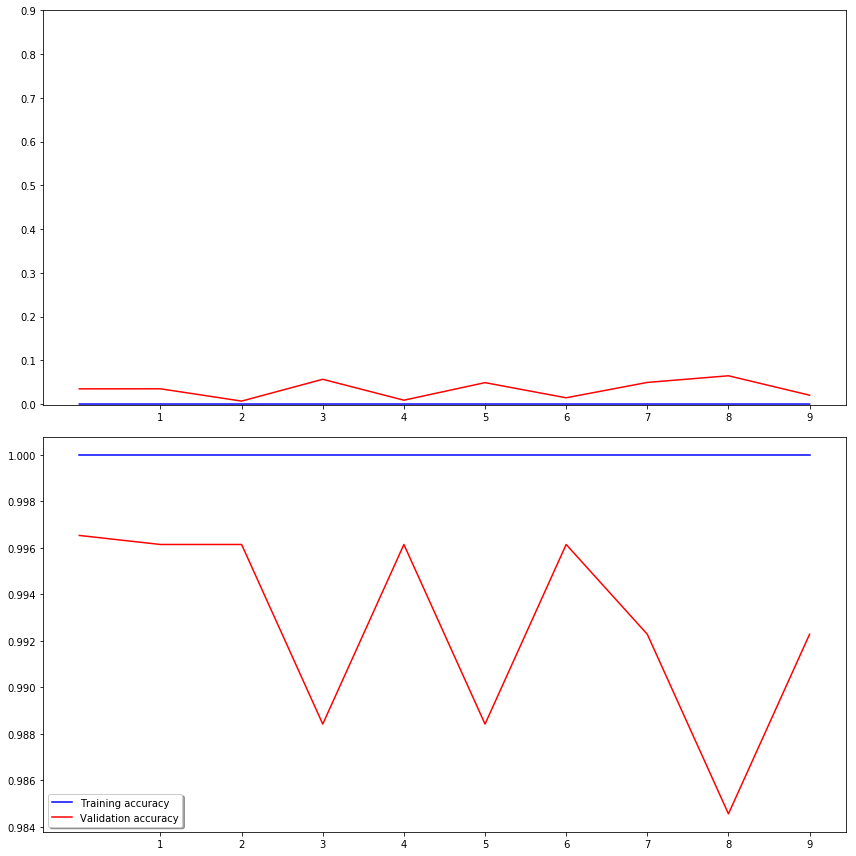

In [0]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.label=True
plt.tight_layout()
plt.show()



In [0]:
validation_set = datagen.flow_from_directory(
       directory=images,
        target_size=(64, 64),
        batch_size=32,
        #classes=['Dog','Cat'],
        subset = "validation",
        class_mode='binary')

STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size


predictions = classifier.predict_generator(validation_set, steps=10)

threshold = 0.5

df = pd.DataFrame()

df['labels'] = validation_set.labels
df['filepaths'] = validation_set.filepaths
df['filename'] = validation_set.filenames
df['name'] = [str(k).split('/')[0] for k in validation_set.filenames]

df['probability'] = predictions
df['category'] = np.where(df['probability'] > threshold, 1,0)
df['category_name'] = df['category'].apply(lambda x: list(mydict.keys())[list(mydict.values()).index(x)])


Found 291 images belonging to 2 classes.


In [0]:
np.random.np.random.randint(18)

NameError: ignored

ValueError: ignored

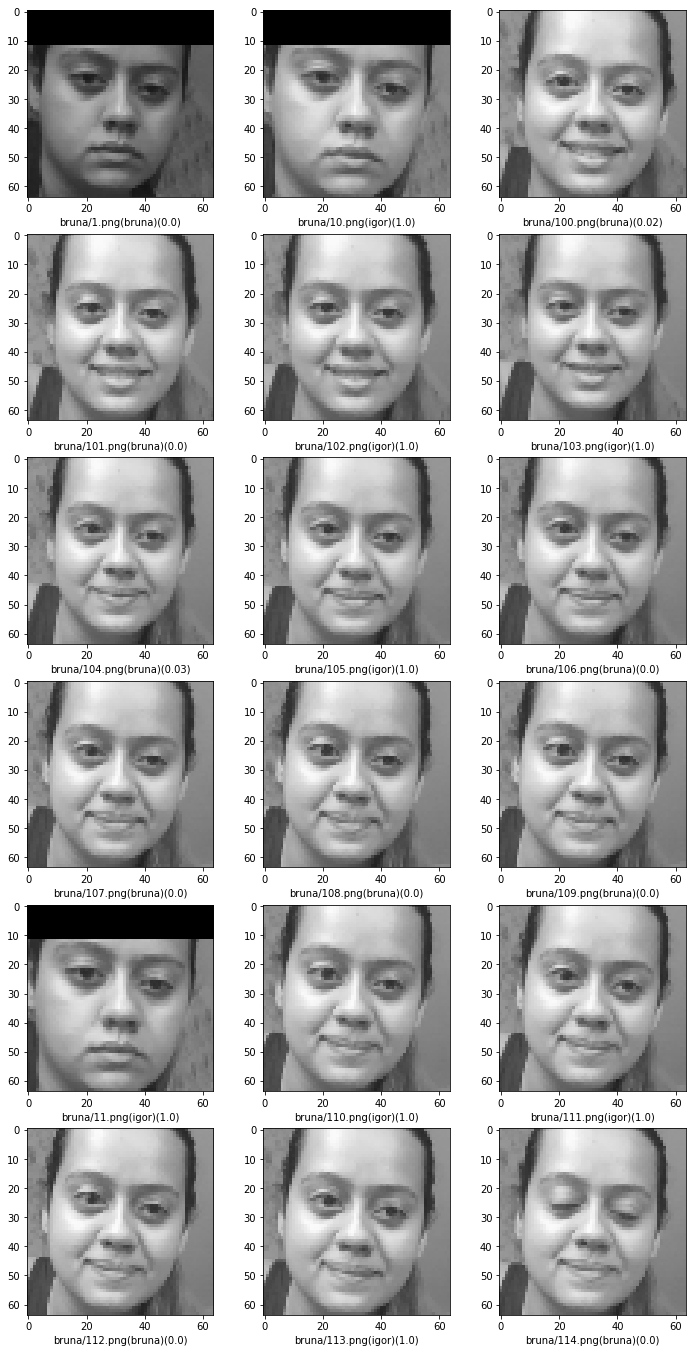

In [0]:
IMAGE_SIZE = validation_set.image_shape[:-1]

np.random.np.random.randint

sample_test = df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category_name']
    probability = row['probability']
    file_path = row['filepaths']
    img = load_img(file_path, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' '(' + "{}".format(round(probability, 2)) + ')')
plt.tight_layout()
plt.show()

TypeError: ignored

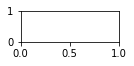

In [0]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pylab as plt

plt.figure(figsize=(12, 24))

samples = 10
index = 0

for j in range(0,samples):
  fig, ax = plt.subplot(6, 3, index+1)
  index=+1
  
  img_path = validation_set.filepaths[j]
  if predict[j][0]>=0.5:
    legend = 'Igor'
  else:
    legend = 'bruna'
    
  img = cv2.imread(img_path)
  ax.imshow(img, interpolation='nearest', cmap=cm.gray)
  ax.text(5, 5, legend, bbox={'facecolor': 'white', 'pad': 10})
  plt.show()
#training_set.class_indices


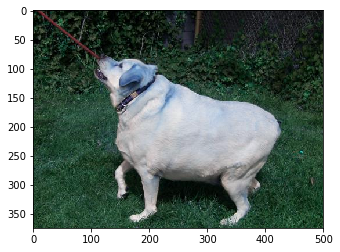

In [28]:
import cv2
import matplotlib.pyplot as plt
img = '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Dog/11703.jpg'
img = cv2.imread(img)
plt.imshow(img)

In [0]:
df

,labels,filepaths,Name,probability,category
0,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,1.000000e+00,1
1,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,4.211068e-05,0
2,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,0.000000e+00,0
3,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,2.980232e-08,0
4,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,6.012321e-03,0
5,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,5.960464e-08,0
6,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,2.384186e-07,0
7,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,1.966953e-06,0
8,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,5.066395e-07,0
9,0,/content/gdrive/My Drive/Colab Notebooks/01Com...,bruna,2.868921e-03,0


In [0]:
list(mydict.keys())[list(mydict.values()).index(1)]

'igor'

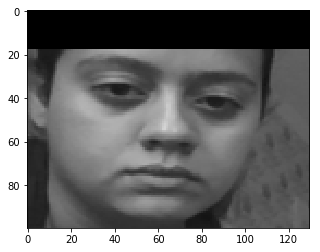

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(validation_set.filepaths[0])
plt.imshow(img)
plt.show()


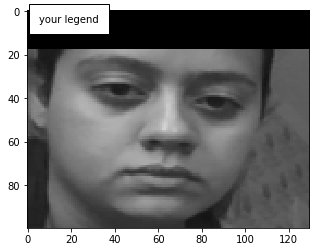

In [0]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pylab as plt

fig, ax = plt.subplots(1)
img = cv2.imread(validation_set.filepaths[0])
ax.imshow(img, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, 'your legend', bbox={'facecolor': 'white', 'pad': 10})
plt.show()

In [0]:
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/03_CNN_Keras_Tensorflow_FaceDetection'

In [0]:
import time

while True:
  time.sleep(60)

In [0]:
!ls -la

total 2114
-rw------- 1 root root 2123867 May 14 19:42 'Copy of OpenCV - Feature Matcher.ipynb'
-rw------- 1 root root   35545 Feb 10  2017 'MSR-LA - 3467.docx'
drwx------ 7 root root    4096 May 14 19:14  PetImages
-rw------- 1 root root     104 Feb 10  2017 'readme[1].txt'


# 03 - Define Project Path

In [0]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/01_FeatureMatching")

sys.path.append("/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/01_FeatureMatching")

# Root directory of the project

ROOT_DIR = os.path.abspath(".")

In [0]:
ROOT_DIR

'/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/01_FeatureMatching'

# 03 - Load Pictures

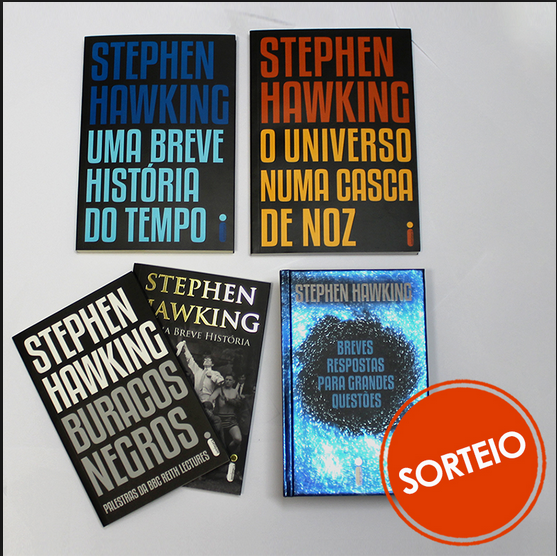

In [0]:
img1 = cv.imread(os.path.join(ROOT_DIR, 'books.png'),0)          # queryImage
Image('books.png', width=200, height=230)


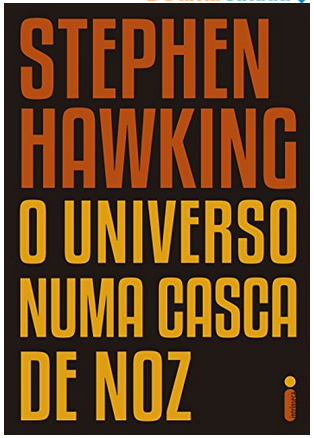

In [0]:
img2 = cv.imread(os.path.join(ROOT_DIR, 'book.png'),0) # trainImage
Image("book.png", width=200, height=230)


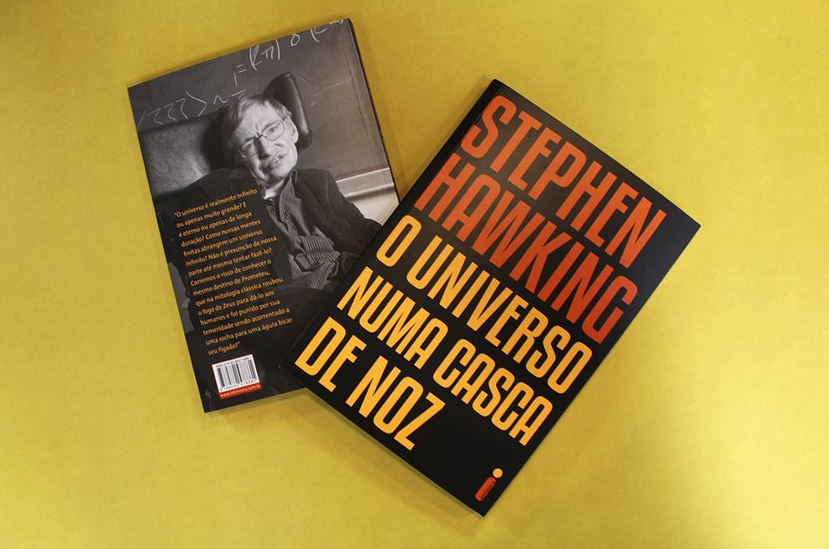

In [0]:
img3 = cv.imread(os.path.join(ROOT_DIR, 'book3.png'),0) # trainImage
Image("book3.png", width=200, height=200)


# Detectors

### 1.   FLANN based Matcher 



In [0]:
import cv2
import numpy as np
#img1 = cv2.imread("the_book_thief.jpg", cv2.IMREAD_GRAYSCALE)
#img2 = cv2.imread("me_holding_book.jpg", cv2.IMREAD_GRAYSCALE)
# ORB Detector
orb = cv2.ORB_create(nfeatures=1500)
kp1, des1 = orb.detectAndCompute(img2, None)
kp2, des2 = orb.detectAndCompute(img3, None)
# Brute Force Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
matching_result = cv2.drawMatches(img2, kp1, img3, kp2, matches[:50], None, flags=2)
#cv2.imshow("Img1", img1)
#cv2.imshow("Img2", img2)
#cv2.imshow("Matching result", matching_result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

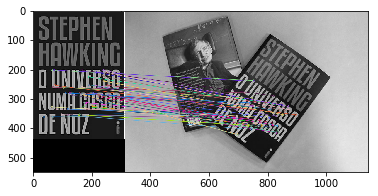

(<matplotlib.image.AxesImage at 0x7fb3bcfb5588>, None)

In [0]:
plt.imshow(matching_result,),plt.show()


### 2.   FLANN based Matcher 

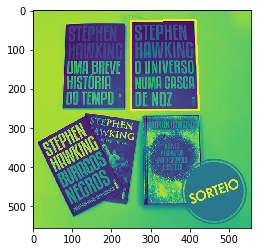

In [0]:
import cv2 as cv

import numpy as np
img = cv.imread(os.path.join(ROOT_DIR, 'book.png'),0)
#cap = cv2.VideoCapture(0)
# Features
sift = cv2.xfeatures2d.SIFT_create()
kp_image, desc_image = sift.detectAndCompute(img, None)
# Feature matching
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
#while True:

#_, frame = cap.read()
frame = cv.imread(os.path.join(ROOT_DIR, 'books.png'),0)
grayframe = cv2.cvtColor(frame, cv2.COLOR_BAYER_BG2GRAY) # trainimage
kp_grayframe, desc_grayframe = sift.detectAndCompute(grayframe, None)
matches = flann.knnMatch(desc_image, desc_grayframe, k=2)
good_points = []
for m, n in matches:
    if m.distance < 0.6*n.distance:
        good_points.append(m)
#img3 = cv2.drawMatches(img, kp_image, grayframe, kp_grayframe, good_points, grayframe)
# Homography
if len(good_points) > 10:
    query_pts = np.float32([kp_image[m.queryIdx].pt for m in good_points]).reshape(-1, 1, 2)
    train_pts = np.float32([kp_grayframe[m.trainIdx].pt for m in good_points]).reshape(-1, 1, 2)
    matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()
    # Perspective transform
    h, w = img.shape
    pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, matrix)
    homography = cv2.polylines(frame, [np.int32(dst)], True, (255, 0, 0), 3)
    plt.imshow(homography,),plt.show()
    #cv2.imshow("Homography", homography)
else:
    plt.imshow(grayframe,),plt.show()
    #cv2.imshow("Homography", grayframe)
#cv2.imshow("Image", img)
#cv2.imshow("grayFrame", grayframe)
#cv2.imshow("img3", img3)
#key = cv2.waitKey(1)
#if key == 27:
#    break
#cap.release()
#cv2.destroyAllWindows()

### Optional - Reinstall OpenCV

In [0]:
!pip install opencv-python==3.4.2.16

In [0]:
!pip install opencv-contrib-python==3.4.2.16